# Exploratory Data Analysis (EDA)

This notebook performs an initial EDA analysis on the provided data, along with feature engineering. The following questions are addressed:
- How complete is this dataset?
- What is the distribution of each of the features?
- What is the relationship of each feature with the label?
- Are the features linked to each other?
- Is there any further information that we extract from the provided data (a.k.a. Feature Engineering)?

**Insights**

1- How complete is this dataset?
- Cabin feature is heavily incomplete, potentially because most people on board didn't have a cabin. This is something that we will review later in the EDA, correlating Pclass and Cabin
- Age is heavily missing as well, with almost 20% missing
- There are few people that embarked without being noticed, as they weren't in the port record

2- What is the distribution of each of the features?
- The labels are slightly skewed towards "Not Survived" (62 / 38). This might require some pre-processing to avoid biasing the algorithm
- Most people were 3rd class, with no siblings or parents on-board
- There are significantly more male than women, on a proportion similar to the Survived / Not Survived one
- Most people embarcked from Southampton
- Fares are highly skewed towards the low end, and this is potentially highly correlated with PClass

3- What is the relationship of each feature with the label?
- Sex is clearly correlated with the chances of survival
- Fare and Pclass are mildly correlated. The high end tickets tend to have higher chances to survive
- Having less family inside the boat seems to mildly increase your survival chances
- It is unclear whether embarking on one port or another increases your chances. It seems like the port C has slightly higher survival rate, but it might be related with the type of tickets that are purchased there.
- It doesn't seem to be a strong correlation with Age


# 0. Load Libraries and Input Data

In [9]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sys.path.append("../")
from utils.preprocessing_tools import perc_missing_vals

train_data = pd.read_csv('../input/train.csv')
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The features descriptions are the following:
- **PassengerId**: Unique ID associated with each passenger
- **Survived**: Whether the passenger survived, 0 = No, 1 = Yes
- **Pclass**: Ticker class, 1st, 2nd or 3rd
- **Name**: Passenger name
- **Sex**: Passenger sex
- **Age**: Passenger age
- **SibSp**: Number of siblings / spouses aboard
- **Parch**: Number of parents / children aboard
- **Ticket**: Ticker number
- **Fare**: Passenger fare
- **Cabin Number**: Passenger cabin Id. Not available for all.
- **Embarked**: Port where the passenger embarked

# 1. How complete is this dataset?


Various insights on this analysis:
- Cabin feature is heavily incomplete, potentially because most people on board didn't have a cabin. This is something that we will review later in the EDA, correlating Pclass and Cabin
- Age is heavily missing as well, with almost 20% missing
- There are few people that embarked without being noticed, as they weren't in the port record

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
perc_missing_vals(train_data)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64


# 2. What is the distribution of each of the features?

Insights from this analysis:
- The labels are slightly skewed towards "Not Survived" (62 / 38). This might require some pre-processing to avoid biasing the algorithm
- Most people were 3rd class, with no siblings or parents on-board
- There are significantly more male than women, on a proportion similar to the Survived / Not Survived one
- Most people embarcked from Southampton
- Fares are highly skewed towards the low end, and this is potentially highly correlated with PClass

In [27]:
train_data.Survived.value_counts() / len(train_data)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

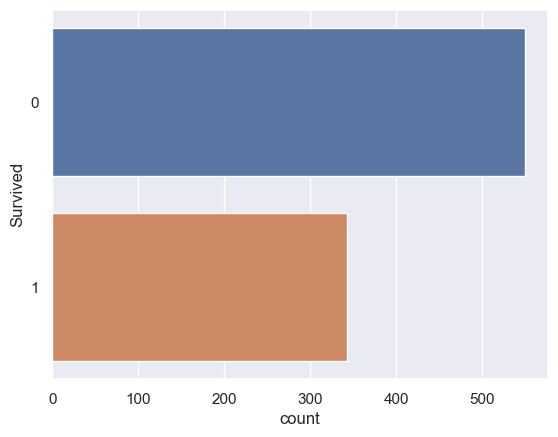

In [21]:
# Label Analysis
sns.countplot(data=train_data, y='Survived')


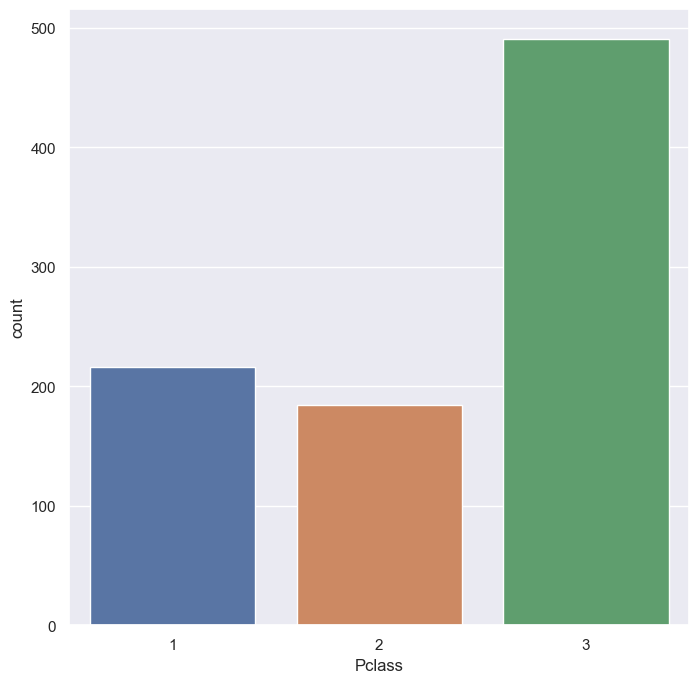

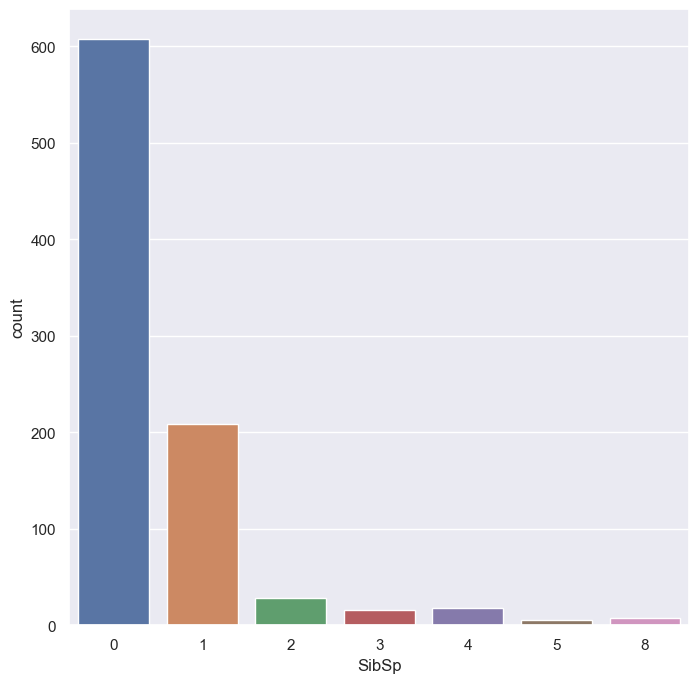

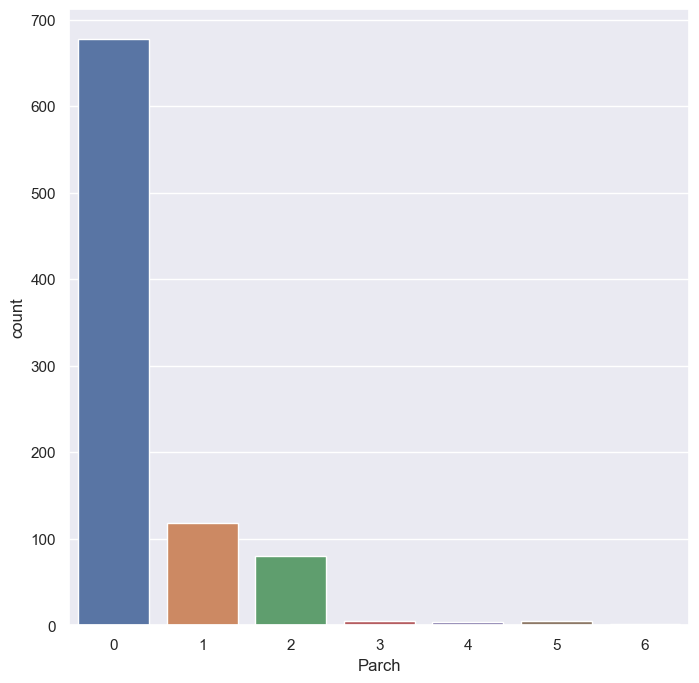

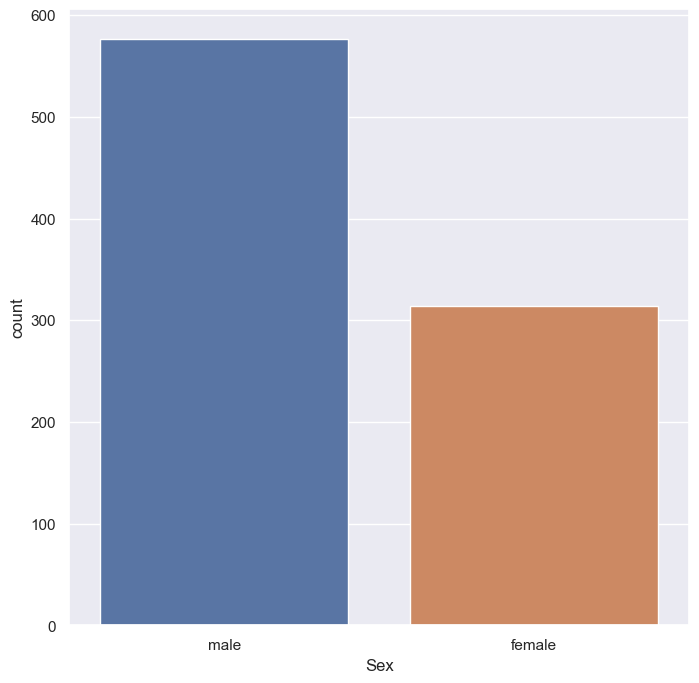

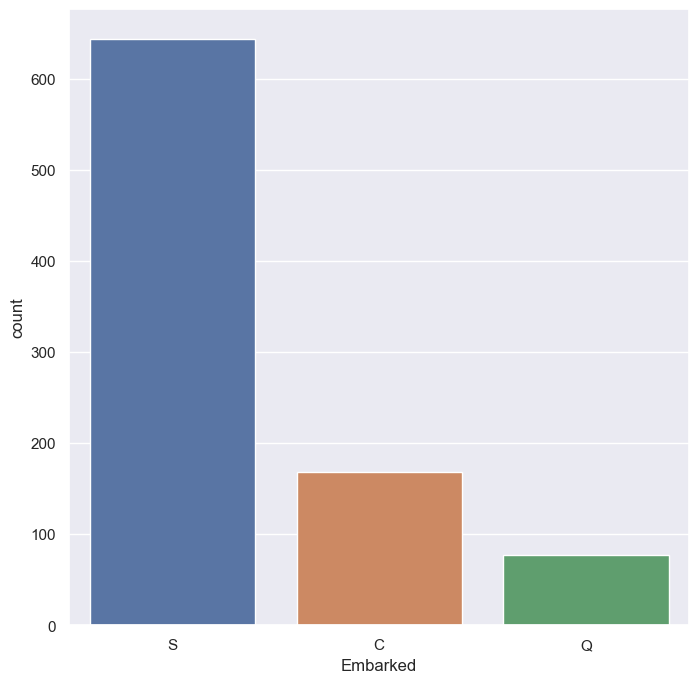

In [23]:
# Histogram of numerical variables
countplot_features = ['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']
for feat in countplot_features:
    plt.figure(figsize=(8,8))
    sns.countplot(data=train_data, x=feat)

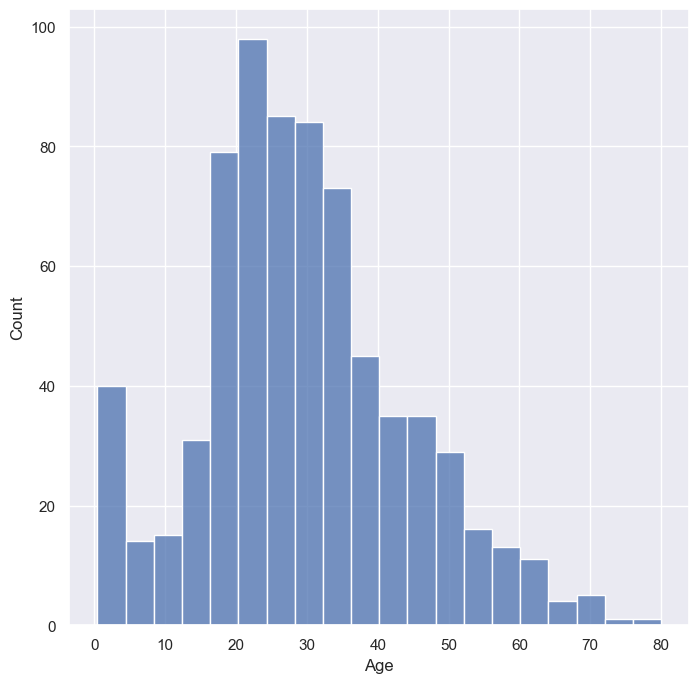

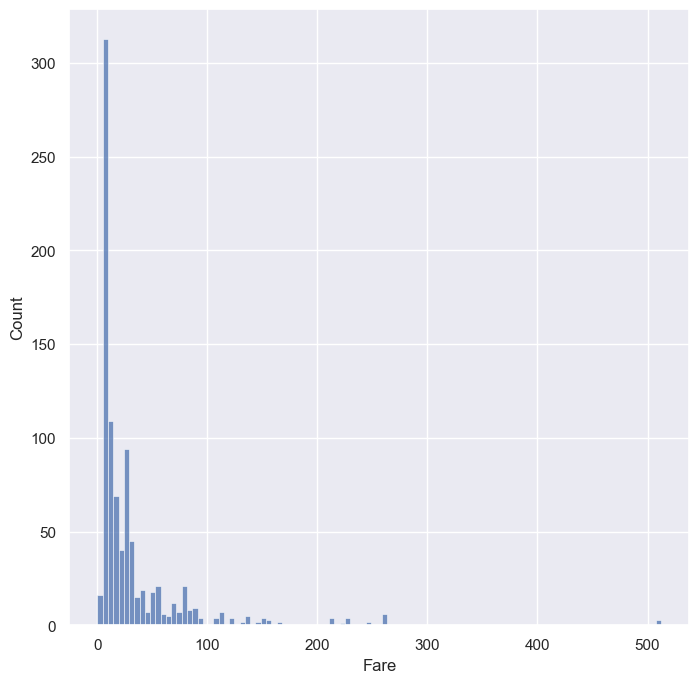

In [24]:
hist_features = ['Age', 'Fare']
for feat in hist_features:
    plt.figure(figsize=(8,8))
    sns.histplot(data=train_data, x=feat)

# 3. What is the relationship of each feature with the label?

We will generate similar plots as before, but now looking at the features vs labels.

**Insights**
- Sex is clearly correlated with the chances of survival
- Fare and Pclass are mildly correlated. The high end tickets tend to have higher chances to survive
- Having less family inside the boat seems to mildly increase your survival chances
- It is unclear whether embarking on one port or another increases your chances. It seems like the port C has slightly higher survival rate, but it might be related with the type of tickets that are purchased there.
- It doesn't seem to be a strong correlation with Age

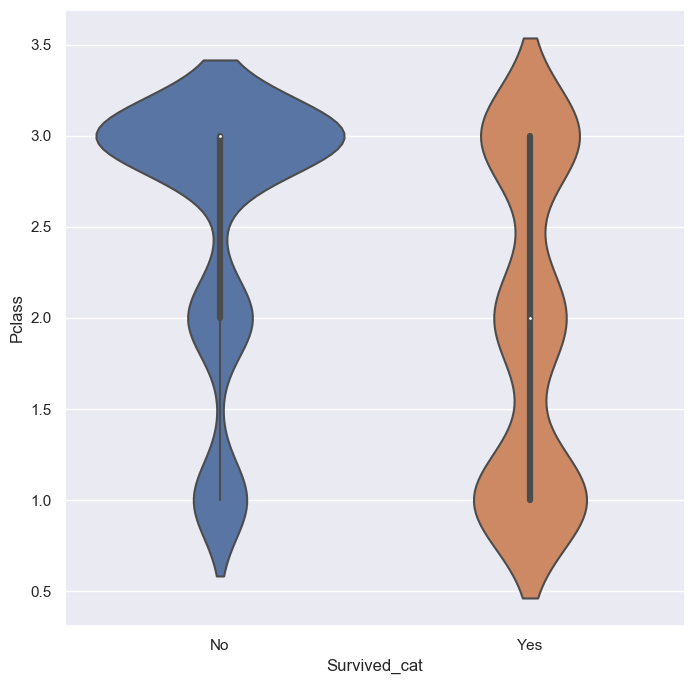

<Figure size 800x800 with 0 Axes>

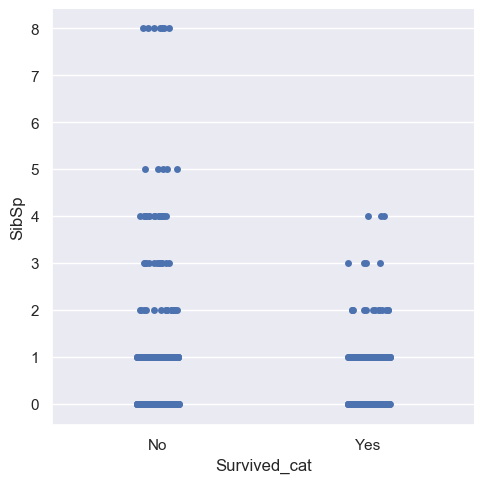

<Figure size 800x800 with 0 Axes>

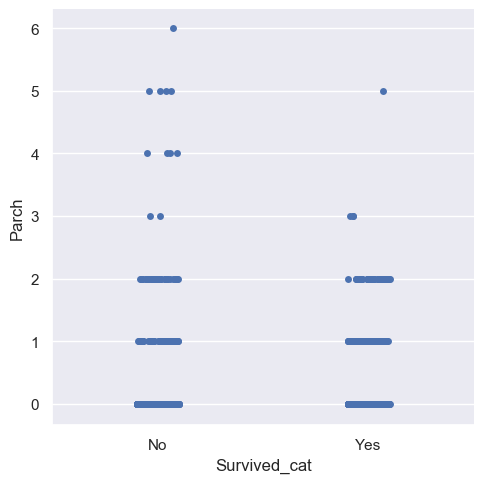

<Figure size 800x800 with 0 Axes>

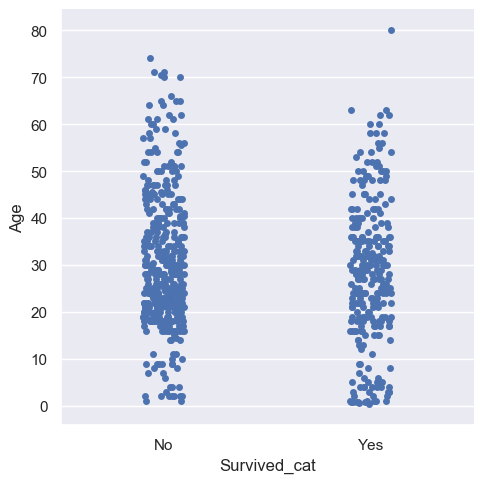

<Figure size 800x800 with 0 Axes>

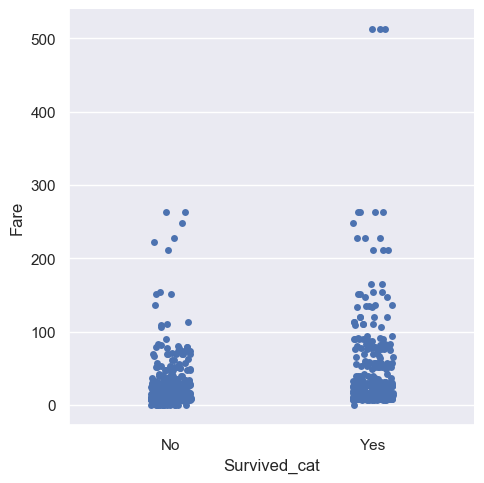

In [47]:
# For this analysis, we convert the feature "Survived" as categorical
train_data['Survived_cat'] = train_data['Survived'].apply(lambda x: "Yes" if x==1 else "No")

# Violin Plot
features = ['Pclass']
for feat in features:
    plt.figure(figsize=(8,8))
    sns.violinplot(data=train_data, y=feat, x='Survived_cat')

# Categorical plot
features = ['SibSp', 'Parch', 'Age', 'Fare']
for feat in features:
    plt.figure(figsize=(8,8))
    sns.catplot(data=train_data, y=feat, x='Survived_cat')

<Figure size 800x800 with 0 Axes>

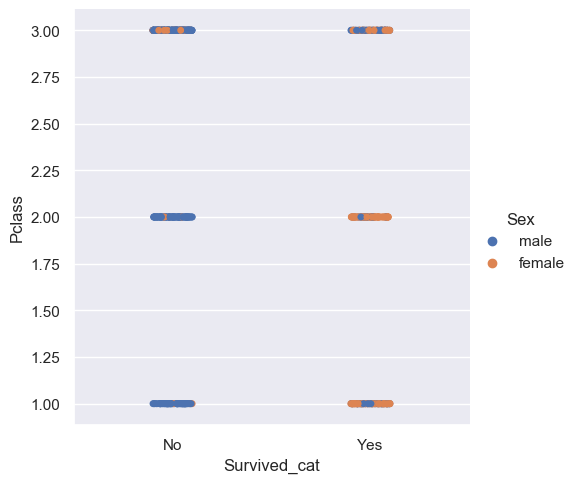

<Figure size 800x800 with 0 Axes>

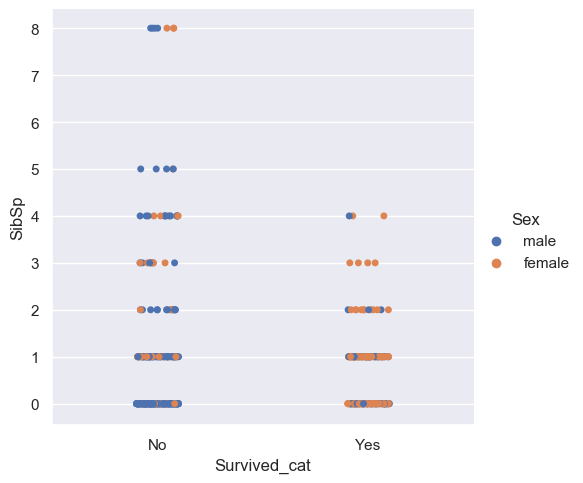

<Figure size 800x800 with 0 Axes>

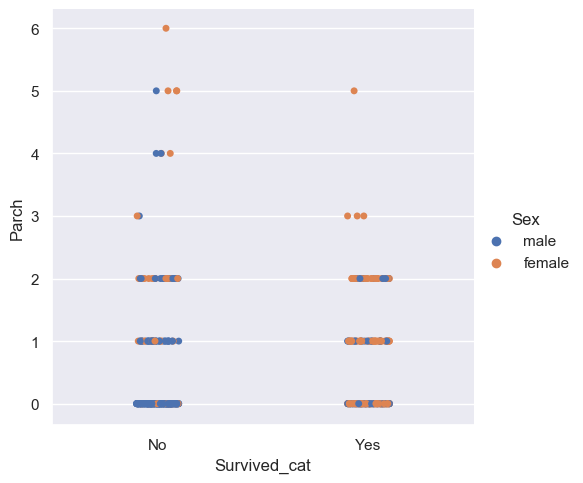

<Figure size 800x800 with 0 Axes>

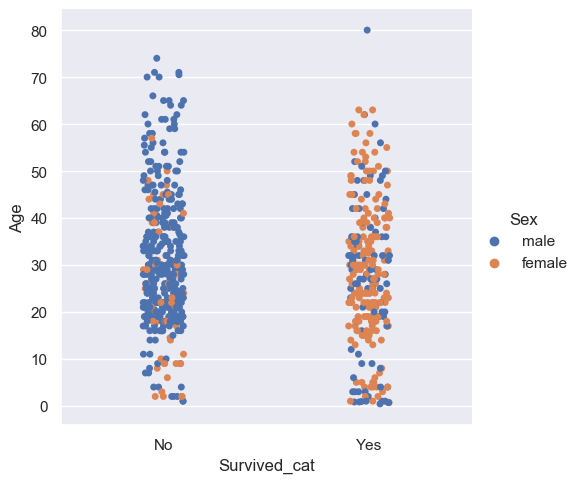

<Figure size 800x800 with 0 Axes>

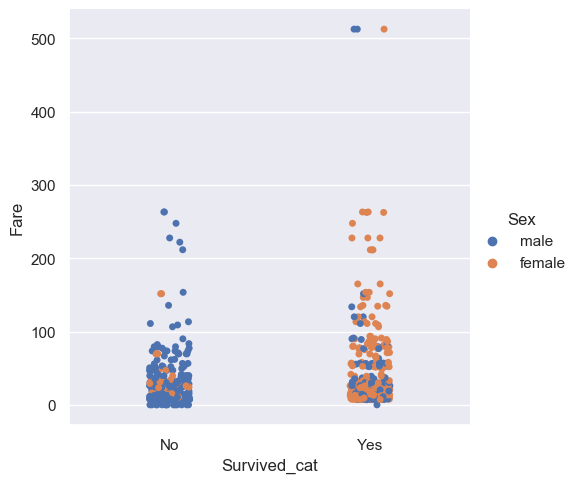

In [43]:
# For this analysis, we convert the feature "Survived" as categorical
train_data['Survived_cat'] = train_data['Survived'].apply(lambda x: "Yes" if x==1 else "No")

# Histogram of numerical variables
features = ['Pclass', 'SibSp', 'Parch', 'Age', 'Fare']
for feat in features:
    plt.figure(figsize=(8,8))
    sns.catplot(data=train_data, y=feat, x='Survived_cat', hue="Sex")

<Figure size 800x800 with 0 Axes>

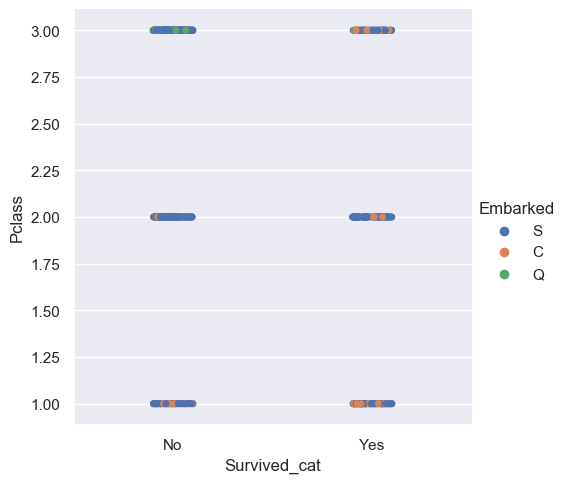

<Figure size 800x800 with 0 Axes>

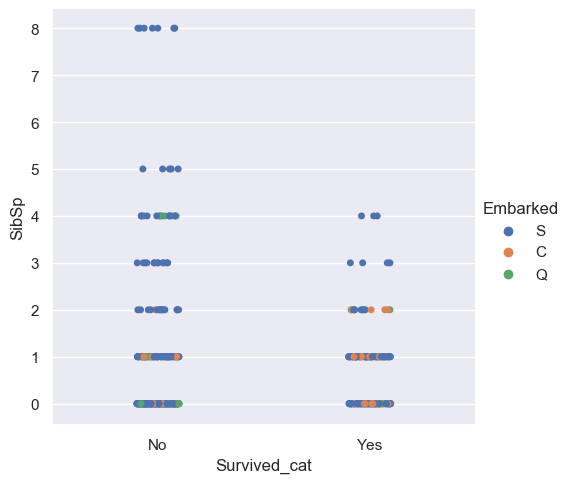

<Figure size 800x800 with 0 Axes>

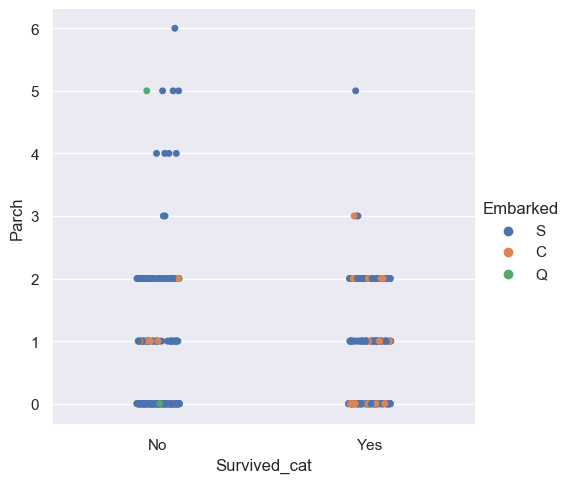

<Figure size 800x800 with 0 Axes>

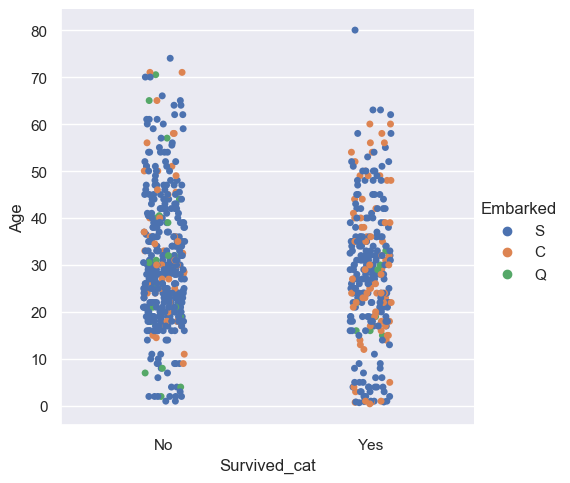

<Figure size 800x800 with 0 Axes>

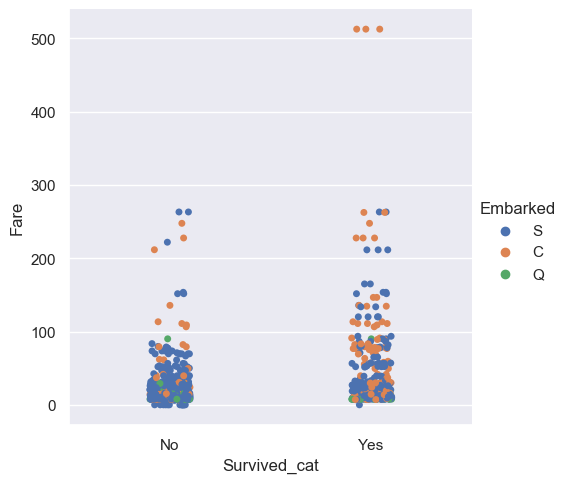

In [45]:
# For this analysis, we convert the feature "Survived" as categorical
train_data['Survived_cat'] = train_data['Survived'].apply(lambda x: "Yes" if x==1 else "No")

# Histogram of numerical variables
features = ['Pclass', 'SibSp', 'Parch', 'Age', 'Fare']
for feat in features:
    plt.figure(figsize=(8,8))
    sns.catplot(data=train_data, y=feat, x='Survived_cat', hue="Embarked")

# 4. Are the features linked to each other?

In this analysis, we will perform several analysis:
- First, we will perform a scatter matrix for all features. Categorical variables will be analyzed separately
- Secondly, create a correlation matrix
- Lastly, we will look at the Predictive Power of these variables, following the approach discussed [here](https://medium.com/towards-data-science/rip-correlation-introducing-the-predictive-power-score-3d90808b9598)

Insights from this analysis:

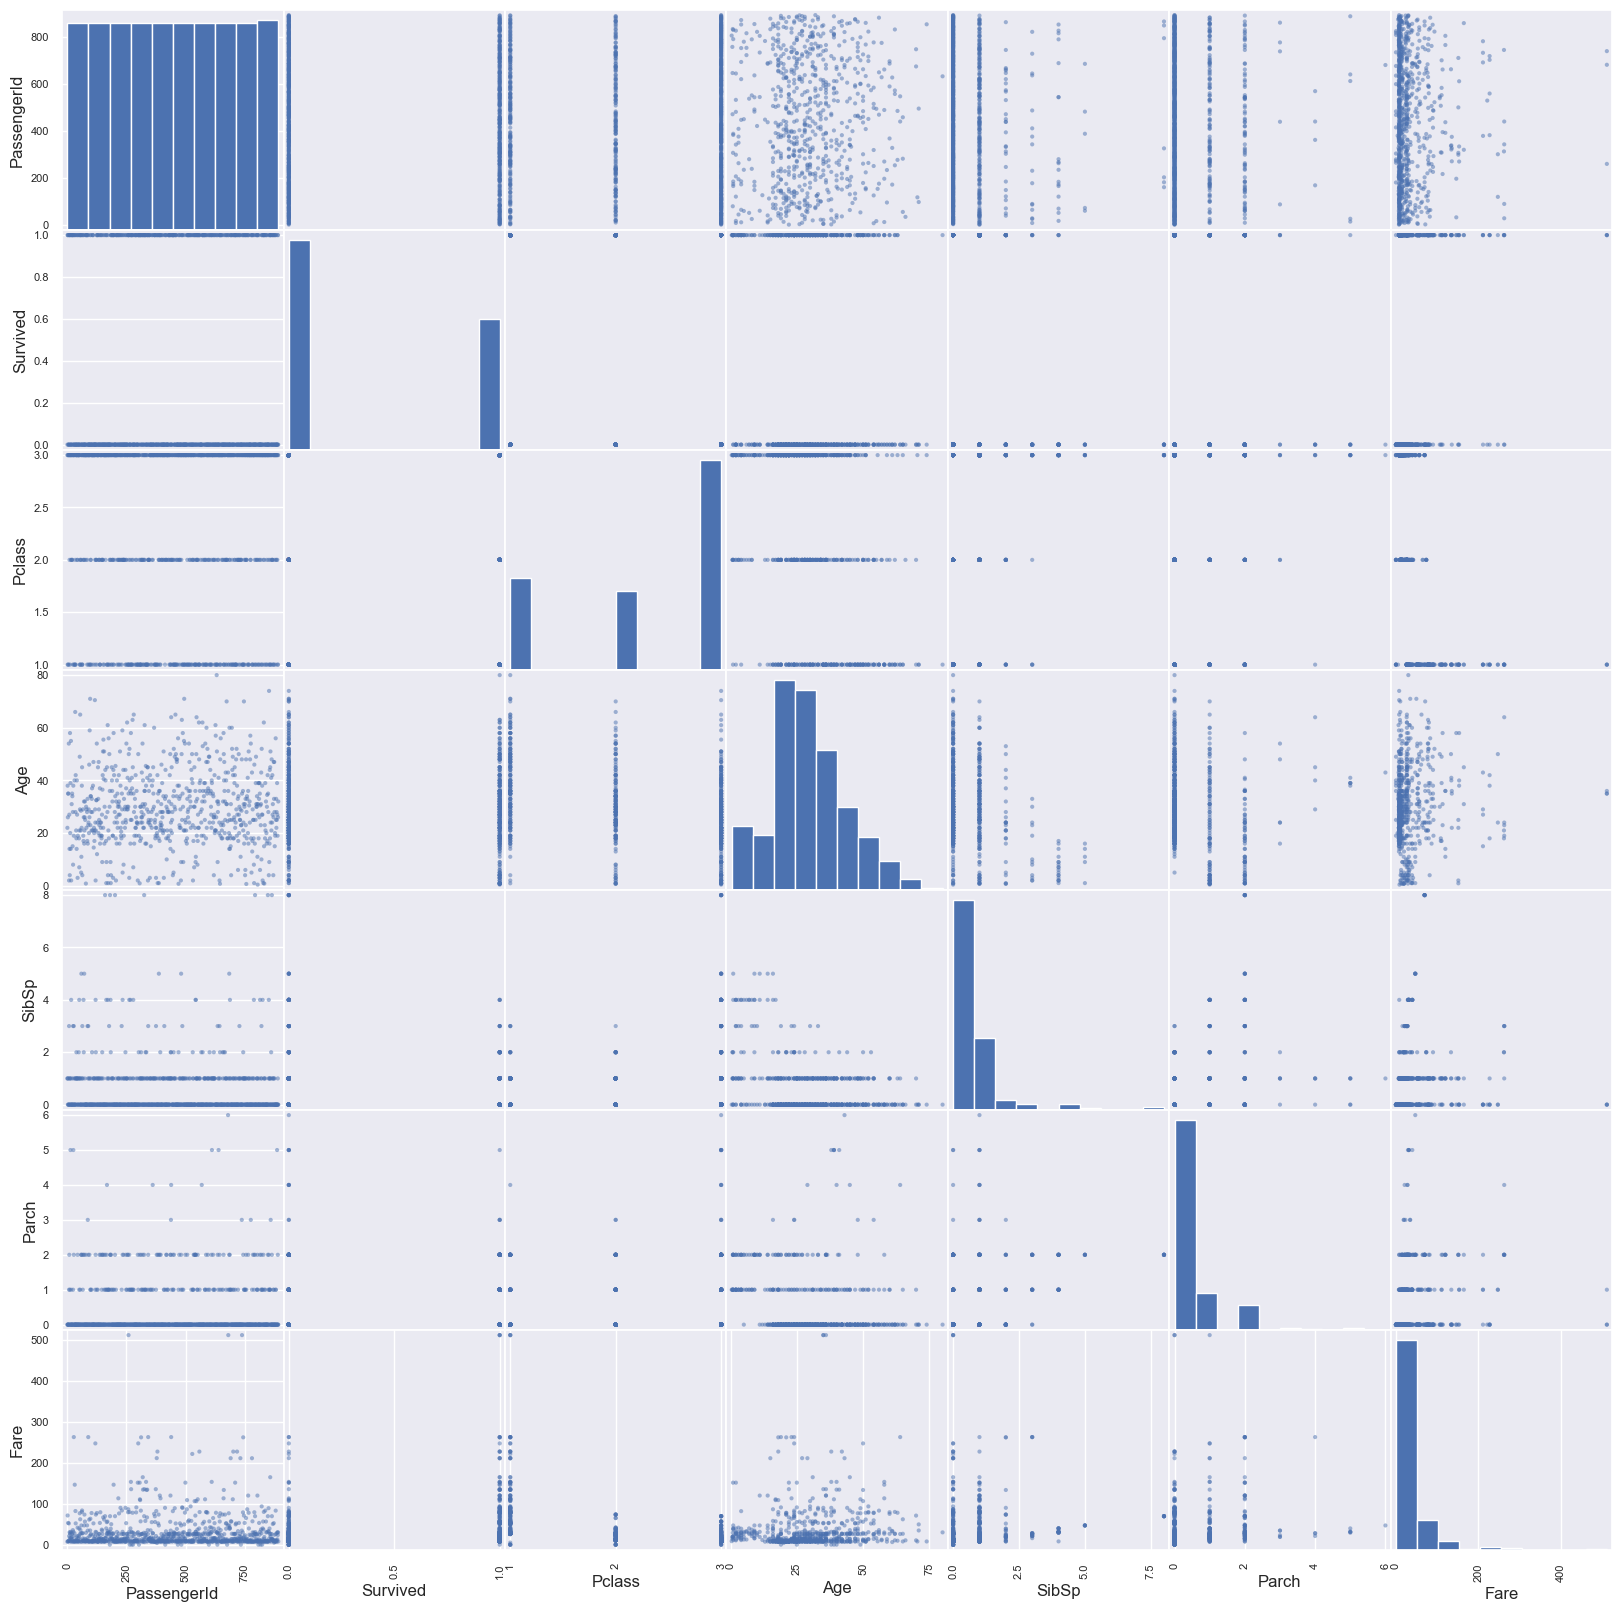

In [33]:
# Create scatter matrix using pandas built-in functionality
fig = pd.plotting.scatter_matrix(train_data, figsize=(20,20))

# NEED TO CONTINUE WITH CATEGORICAL VALUES